In [2]:
#Imports 
import pip
import glob, os
from sklearn import svm 
import scipy.io as sc
import numpy as np
from HelperFunctions_ import write_dataset_to_file, split_dataset_paths, subFrame, preprocesing_data, combinePictures, combineModels, classesInLabels, combineLabelClasses, lessBands
import sys 
from spectral import *

import tables as tab
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn import datasets
import copy
import spectral


In [3]:
#Finding path names 
Mjosa_data = split_dataset_paths("../Datasets/2022_07_11_Mjosa/2022_07_11_Mjosa/", ["he5", "csv", "jpg"])
Andebu_data = split_dataset_paths("../Datasets/2021_07_21_Andebu/2021_07_21_Andebu/", ["he5", "csv", "jpg"])
Telemark_data = split_dataset_paths("../Datasets/2020_06_23_Telemarkskanalen/2020_06_23_Telemarkskanalen/", ["he5", "csv", "jpg"])

samson_data = split_dataset_paths("../Datasets/samson/", ["mat"])
jasper_data = split_dataset_paths("../Datasets/jasper/", ["mat"])



In [4]:
#Amount of dataset should be handled
N_datasets = 4

#Open files 
open_files_array = []
for i in range(N_datasets):
    file = tab.open_file(Mjosa_data["he5"][i])
    open_files_array.append(file.get_node("/HDFEOS/SWATHS/PRS_L1_HCO/")['Data Fields']['VNIR_Cube'][:,5:,:])

#Load the labels 
load_labels_array = []
for i in range(N_datasets):
    file = Mjosa_data["csv"][i]
    load_labels_array.append(np.loadtxt(file, dtype=np.ubyte))

In [5]:
data = open_files_array[0]
labels = load_labels_array[0]
print(len(labels.flatten()))

1000000


In [6]:
samson = sc.loadmat(samson_data["mat"][1])["V"]
samson_gt = sc.loadmat(samson_data["mat"][0])
samson_labels = np.argmax(samson_gt['A'].T.reshape((-1,3)), axis=1)

jasper = sc.loadmat(jasper_data["mat"][1])["Y"]
jasper_gt = sc.loadmat(jasper_data["mat"][0])
jasper_labels = np.argmax(jasper_gt['A'], axis=0)


In [7]:
#samson_flipped = flipData(samson)
#jasper_flipped = flipData(jasper)

#Samson 95x95 picture, 156 bands
#Japser 115x115 picture, 224 bands 


def reshape_sj(data): 
    """
    Used to reshape the datasets samson and jasper.
    """

    reshaped_data_buffer = []
    pixel_dim = int(np.sqrt(len(data[0])))

    for i in range(len(data)):
        reshaped_data_buffer.append(np.reshape(np.array(data[i]), (pixel_dim, pixel_dim)))

    reshaped_data = []

    for i in range(len(reshaped_data_buffer[0])): 
        X_data = []
        for j in range(len(reshaped_data_buffer)): 
            X_data.append(reshaped_data_buffer[j][i])
        reshaped_data.append(X_data)

    return np.array(reshaped_data)




In [8]:

new_new_samson = reshape_sj(samson)

X = new_new_samson.transpose(0,2,1).reshape((-1,156))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = samson_labels.flatten()

9025


In [9]:
classesInLabels(y)

[2, 0, 1]

In [10]:
# split samson into train test sets
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X,y, test_size=0.999, random_state=1)
print(s_X_train.shape, s_X_test.shape, s_y_train.shape, s_y_test.shape)

svm = SVC(kernel="linear")
svm.fit(s_X_train, s_y_train)

svm.score(s_X_test, s_y_test)

(9, 156) (9016, 156) (9,) (9016,)


0.8614685004436557

In [11]:
#svm_samson.score(s_X_test, s_y_test)
Xout = svm.predict(X)

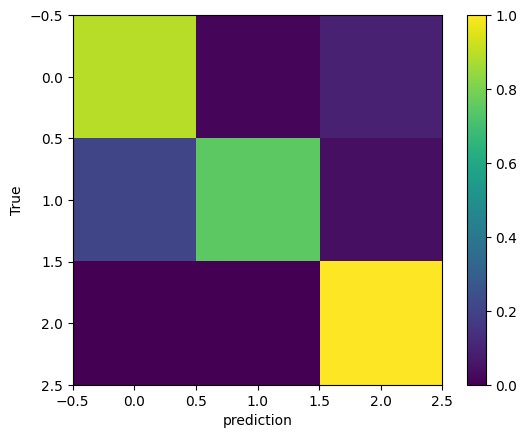

In [12]:
cm = confusion_matrix(y_true = y, y_pred = Xout, normalize='true')

plt.imshow(cm, vmax=1, vmin=0) 
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()

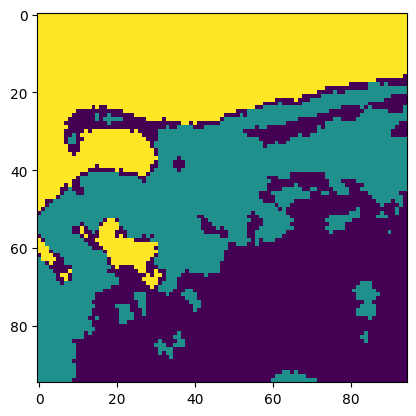

In [13]:
plt.imshow(Xout.reshape((95,95)))

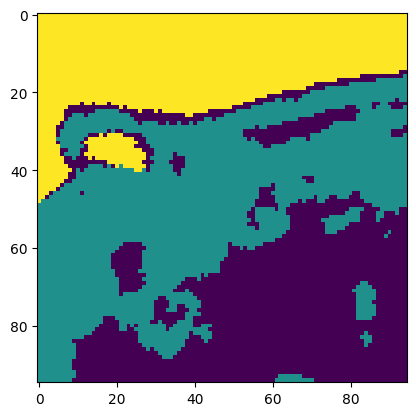

In [14]:
plt.imshow(samson_labels.reshape((95,95)))

In [15]:
seperation = {0 : [[1,2,3], [4,5,6]] , 1 : [[[1,2], [3]],[[4], [5,6]]]}

def DesicionTree(data, labels, class_tree): 

    svm_branches = {}
    
    for branch in class_tree: 
        svm = SVC()
        
    return 0 

In [16]:
X = new_jasper.transpose(0,2,1).reshape((-1,198))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = jasper_labels.flatten()

NameError: name 'new_jasper' is not defined

In [ ]:
# split samson into train test sets
j_X_train, j_X_test, j_y_train, j_y_test = train_test_split(X,y, test_size=0.999, random_state=1)
print(j_X_train.shape, j_X_test.shape, j_y_train.shape, j_y_test.shape)

svm = SVC(kernel="linear")
svm.fit(j_X_train, j_y_train)

svm.score(j_X_test, j_y_test)

(10, 198) (9990, 198) (10,) (9990,)


0.7954954954954955

In [ ]:
#svm_samson.score(s_X_test, s_y_test)
Xout = svm.predict(X)

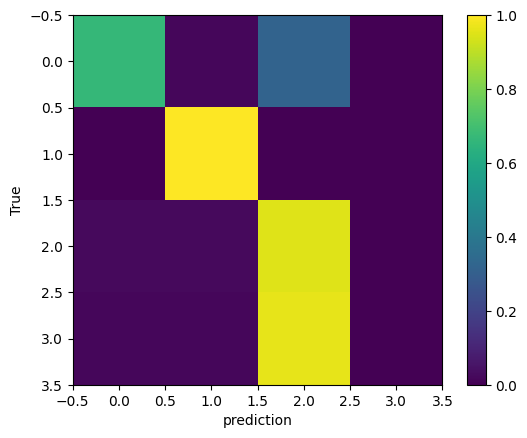

In [ ]:
cm = confusion_matrix(y_true = y, y_pred = Xout, normalize='true')

plt.imshow(cm, vmax=1, vmin=0) 
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()

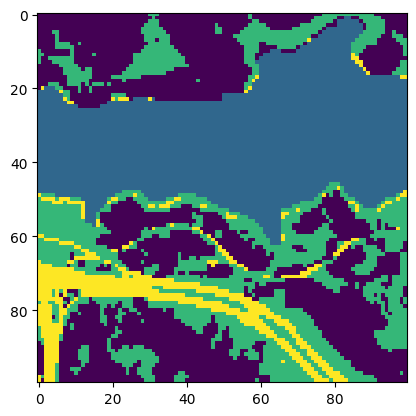

In [ ]:
plt.imshow(jasper_labels.reshape((100,100)))

In [46]:
new_new_samson = reshape_sj(samson)

X = new_new_samson.transpose(0,2,1).reshape((-1,156))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = samson_labels.flatten()



9025


In [48]:
#Desion tree implementation 
train = copy.deepcopy(X)
labels = copy.deepcopy(samson_labels)

labels[labels == 1] = 0 
svm_al = SVC(kernel="rbf")
svm_al.fit(train, labels.flatten())

x_train = train[samson_labels != 2]
labels2 = samson_labels[samson_labels != 2]

svm_be = SVC(kernel="rbf")
svm_be.fit(x_train, labels2)

SVC()

In [49]:
# split samson into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.999, random_state=1)

In [53]:
# Test the predicted yout data vs the true y data. 
yout = svm_al.predict(train)
yout2 = svm_be.predict(x_train)

print((yout==labels).sum()/len(labels))
#(yout4==y[y != 2]).sum()/len(y[y != 2])
print((yout2 == labels2).sum()/len(labels2))

0.9904709141274238
0.9802424786708577


In [44]:
classesInLabels(yout)

[1, 0]

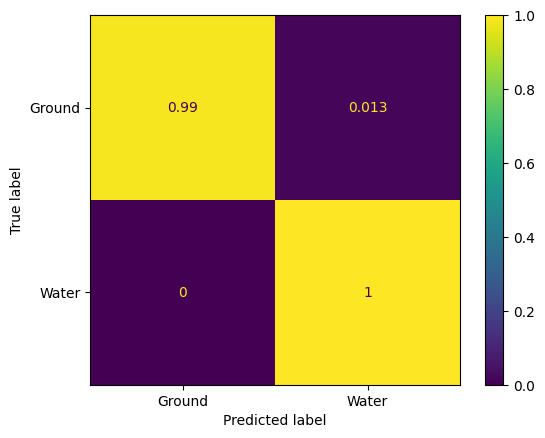

In [54]:
name_classes = ["Ground", "Water"]


cm = confusion_matrix(labels,yout, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
cmd_obj.plot()

In [21]:
print(len(yout))
print(len(yout2))

print(classesInLabels(yout))
print(classesInLabels(yout2))

#print(len(yout[yout == 0]))

count = len(yout2) - len(yout[yout == 0]) 
print(count)

jump_over = 0

for i in range(len(yout)): 
    if(yout[i] == 0): 
        if(jump_over < 10): 
            yout[i] = yout2[jump_over]
            jump_over += 1 
            count += 1
        else: 
            yout[i] = yout2[count]
            count += 1

print(count)

9025
6681
[2, 0]
[0, 1]
86
6681


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

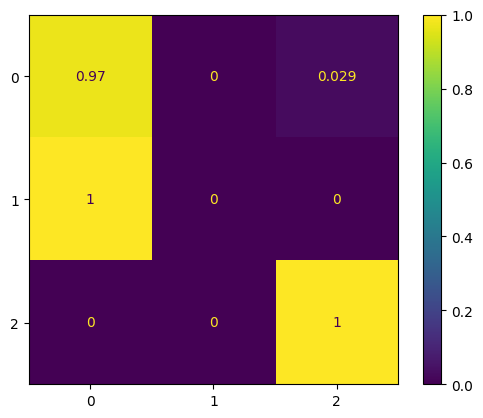

In [32]:
name_classes = ["Ground", "Water"]


cm = confusion_matrix(y,yout, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
cmd_obj.plot()

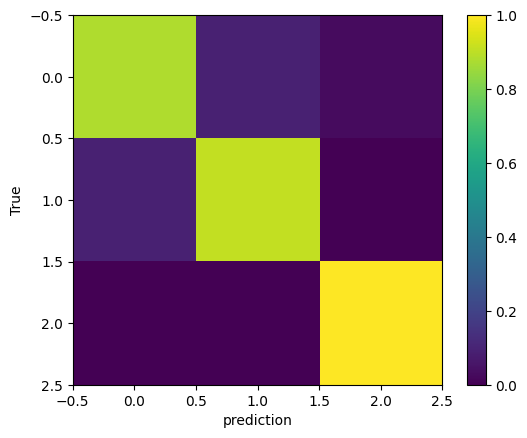

In [23]:
cm = confusion_matrix(y_true = y, y_pred = yout, normalize='true')

plt.imshow(cm, vmax=1, vmin=0) 
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()

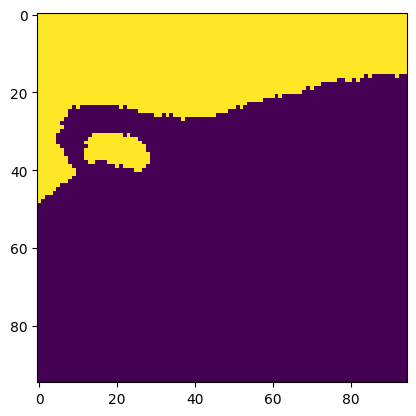

In [55]:
plt.imshow(yout.reshape((95,95)))

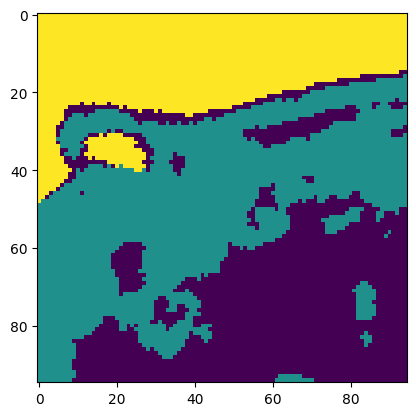

In [25]:
plt.imshow(y.reshape((95,95)))

In [ ]:
# Test the predicted yout data vs the true y data. 
(yout==y).sum()/len(y)

0.9233240997229917

In [90]:
new_jasper = reshape_sj(jasper)

X = new_jasper.transpose(0,2,1).reshape((-1,198))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = jasper_labels.flatten()


10000


In [91]:
classesInLabels(y)

[0, 2, 1, 3]

In [99]:


#Desion tree implementation 
train = copy.deepcopy(X)
train2 = copy.deepcopy(X)
labels = copy.deepcopy(y)
labels2 = copy.deepcopy(y)

labels[labels == 2] = 0
labels[labels == 3] = 0 

y_labels2 = labels2[y != 1]
x_train2 = train2[labels2 != 1]

svm_ab = SVC()
svm_ab.fit(train, labels.flatten())

svm_cd = SVC()
svm_cd.fit(x_train2, y_labels2.flatten())



SVC()

In [100]:
predicted_labels = svm_ab.predict(train)
print((predicted_labels == labels).sum()/len(labels))

0.9981


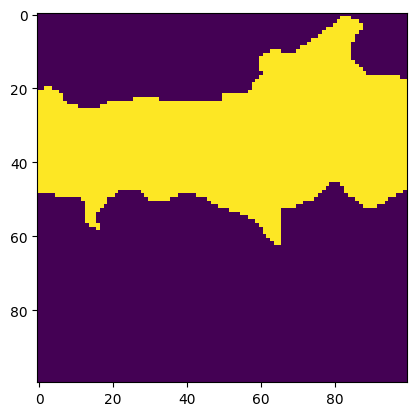

In [101]:
plt.imshow(predicted_labels.reshape((100,100)))

In [102]:
classesInLabels(y_labels2)

[0, 2, 3]

In [103]:
# Test the predicted yout data vs the true y data. 
yout = svm_ab.predict(train)
yout2 = svm_cd.predict(x_train2)


In [104]:
count = np.abs(len(yout2) - len(yout[yout == 0]))
print(count)

jump_over = 0

for i in range(len(yout)): 
    if(yout[i] == 0): 
        if(jump_over < 0): 
            yout[i] = yout2[jump_over]
            jump_over += 1
            count += 1
        else: 
            yout[i] = yout2[count]
            count += 1

print(count)

classesInLabels(yout)

5
6674


[0, 2, 1, 3]

In [108]:
print((yout==labels2).sum()/len(labels2))

0.9004


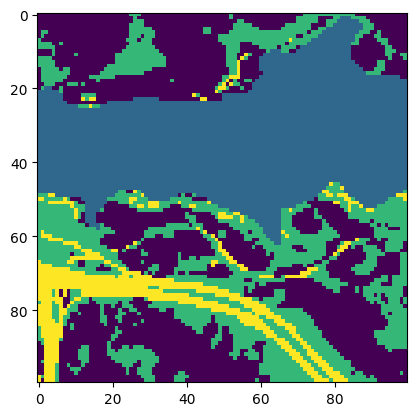

In [109]:
plt.imshow(yout.reshape((100,100)))

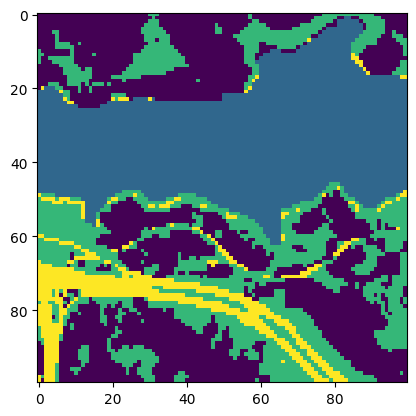

In [110]:
plt.imshow(labels2.reshape((100,100)))

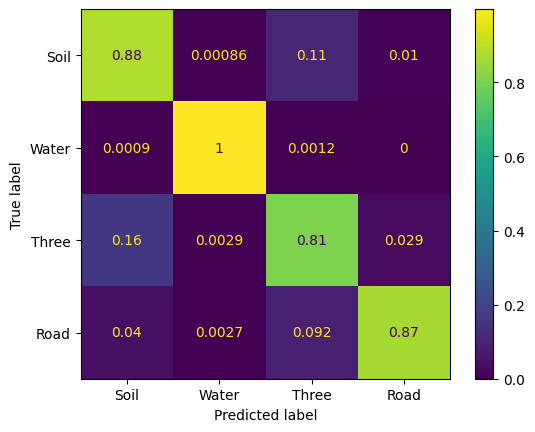

In [107]:
#1 Road, 2# Soil, #3, Water, #4 Three

name_classes = ["Soil", "Water", "Three", "Road"]


cm = confusion_matrix(labels2,yout, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
cmd_obj.plot()